# Regression discontinuity with sci-kit learn models

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel
from sklearn.linear_model import LinearRegression

import causalpy as cp

## Load data

In [2]:
data = cp.load_data("rd")
data.head()

,x,y,treated
0,-0.932739,-0.091919,False
1,-0.930778,-0.382663,False
2,-0.929110,-0.181786,False
3,-0.907419,-0.288245,False
4,-0.882469,-0.420811,False


## Linear, main-effects model

In [3]:
result = cp.skl_experiments.RegressionDiscontinuity(
    data,
    formula="y ~ 1 + x + treated",
    prediction_model=LinearRegression(),
    treatment_threshold=0.5,
)

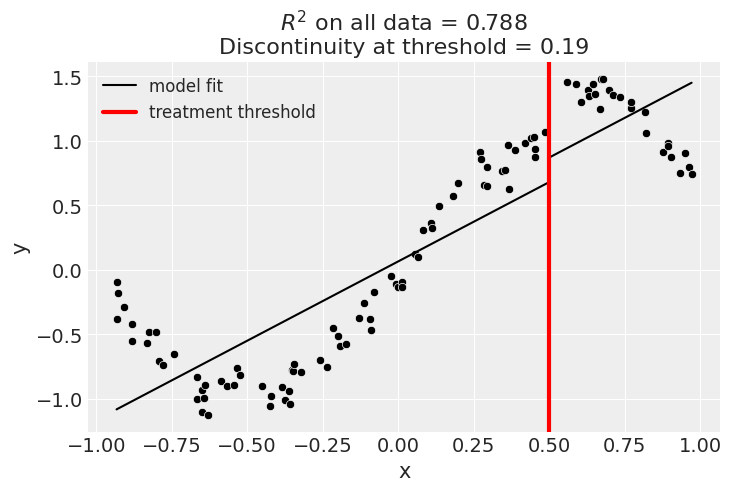

In [4]:
fig, ax = result.plot();

## Linear, main-effects and interaction model

In [5]:
result = cp.skl_experiments.RegressionDiscontinuity(
    data,
    formula="y ~ 1 + x + treated + x:treated",
    prediction_model=LinearRegression(),
    treatment_threshold=0.5,
)

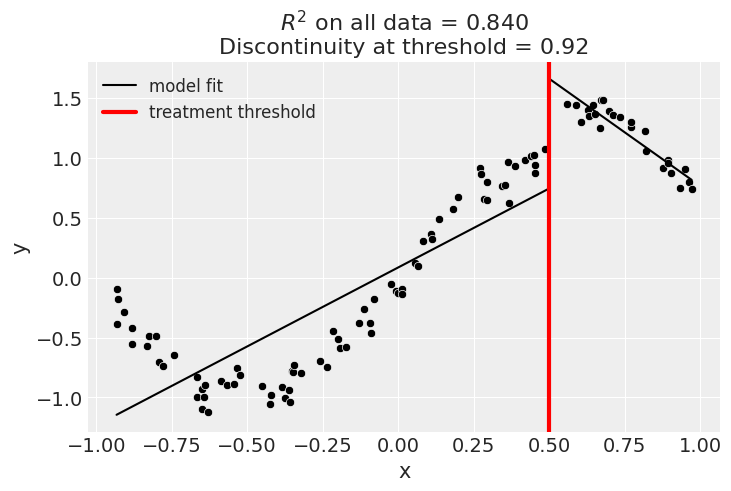

In [6]:
result.plot();

## Using Gaussian Processes

In [7]:
kernel = 1.0 * ExpSineSquared(1.0, 5.0) + WhiteKernel(1e-1)
result = cp.skl_experiments.RegressionDiscontinuity(
    data,
    formula="y ~ 1 + x + treated",
    prediction_model=GaussianProcessRegressor(kernel=kernel),
    treatment_threshold=0.5,
)

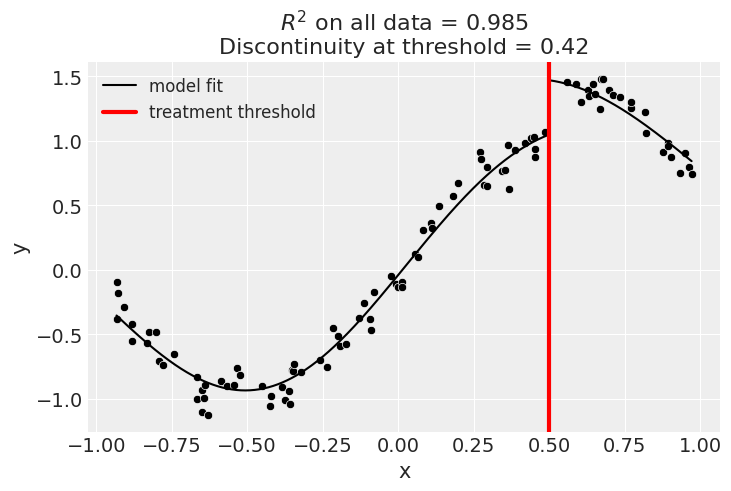

In [8]:
fig, ax = result.plot();

## Using basis splines

In [9]:
# use basis splines
result = cp.skl_experiments.RegressionDiscontinuity(
    data,
    formula="y ~ 1 + bs(x, df=6) + treated",
    prediction_model=LinearRegression(),
    treatment_threshold=0.5,
)

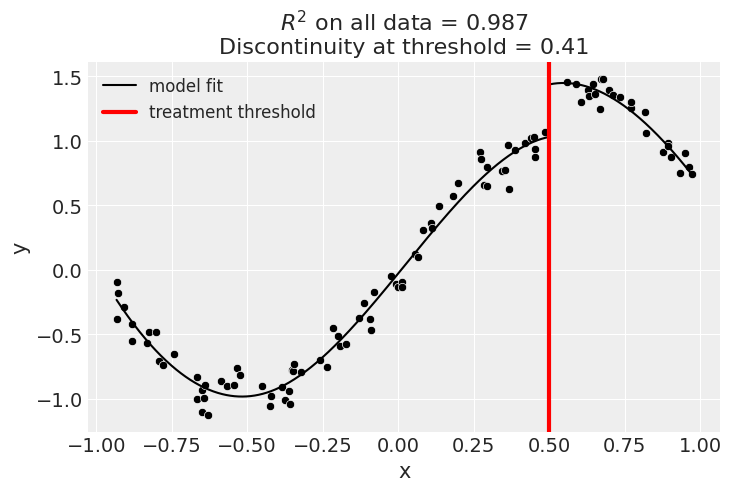

In [10]:
fig, ax = result.plot()